# **Predicting Water Quality**
## **Classification**

Name: Nguyen Tich Bao  

Class: DAAA/FT/1B/02  

Module: AI and Machine Learning

---

#### Reference (In Havard Indentation Formatt)
1. neptune.ai 2022. Balanced Accuracy: When Should You Use It? - neptune.ai (online)
Available at: https://neptune.ai/blog/balanced-accuracy (accessed 27 November 2023)
2. neptune.ai 202. 24 Evaluation Metrics for Binary Classification (And When to Use Them) - neptune.ai (online)
Avaialble at: https://neptune.ai/blog/evaluation-metrics-binary-classification (Accessed on 1 Dec 2023)
3. Medium. What? When? How?: ExtraTrees Classifier - towardsdatascience.com (online)
Available at: https://towardsdatascience.com/what-when-how-extratrees-classifier-c939f905851c (Accessed on 1 Dec 2023)
### Objective
Use a supervised **Binary Classification** machine learning model, which typically  has two target labels, one class is the normal state while the other is an abnormal state to predict whether water is good (1) or not good (0).

### Background Information 

This is a dataset collected from an environmental company. The dataset contains various information on water from different sources. From the perspective of quality control, the company wants to build a machine learning model to predict water quality based on the water properties.

---
 #### Problem Definition
 How accurately can we classifiy whether a water sample is potable, given its chemical components and physical characteristics.



## Importing and Initialising Libraries and Variables


In [53]:
#General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#SKLEARN Libraries and Processing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Model Selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_predict,
    learning_curve,
    StratifiedKFold,
)
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

# IMBLEARN for Pipeline and Data Sampling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Pickle Library = Saving Models
import pickle



# Loading and Preview Data Set

In [3]:
df = pd.read_csv('../Datasets/waterquality.csv', sep=',')
df.tail()
# df.shape[0]

ph    Hardness       Solids  Chloramines     Sulfate  \
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes   Clarity  Quality  
3271    526.424171       13.894419        66.687695  4.435821        1  
3272    392.449580       19.903225              NaN  2.798243        1  
3273    432.044783       11.039070        69.845400  3.298875        1  
3274    402.883113       11.168946        77.488213  4.708658        1  
3275    327.459761       16.140368        78.698446  2.309149        1

## Exploratory Data Analysis

Conducting a Exploratory Data Analysis (EDA) of the given dataset, to gain a better understanding of the characteristics of the given dataset. This data set has 3276 data points (as retrieved from df.shape[0]) and 10 Columns:

**index**: Unique integer identifier ranging from 0 to 3275

**ph**: Measure of water acidity or basicity

**Hardness**: Measures mineral content, impacting pipe scaling and water corrosiveness.

**Solids**: Indicate dissolved and suspended particles, influencing water quality and contamination.

**Chloramines**: chlorine-ammonia compounds, disinfect water, ensuring safety without excessive by-products.

**Sulfate**: Salt dissolved in water, affects taste and may have health implications

**Conductivity**: Water's mineral content and quality by measuring electric conductivity. Pure water is not a good conducter of electicity as increase in ions present in the water increases its conducitivity.


**Organic Carbon**: Organic carbon from decaying matter influences water quality

**Trihalomethanes**: Being disinfection by-products, THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated.

**Clarity**:Reflects water transparency, impacted by suspended particles and (How clear does the water look )

**Quality**: Label indicating whether water is good or otherwise, 1 means good 0 means not good


## Data Exploration and Performing EDA
To avoid unexpected changes being made to the origianal dataset, I'll make a copy of it

In [4]:
df_clone = df.copy()

Retrieving Info about the dataset

In [5]:
df_clone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Clarity          3276 non-null   float64
 9   Quality          3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### ***Observations***
- Datasets contain 10 columns, including 9 features and 1 Target Variable: "Quality"
- Datatype of all columns are float number in **double-precision floating point format**; Except for Quality which are numeric values of either 1 or 0.
- Missing values are obeserved in these columns: **PH**, **Sulfate**, **Trihalomethanes**

*Take note of these columns with missing data as we will have to handle them later in **Data Processing**

## Target Variable

In [6]:
df_clone["Quality"].unique()

array([0, 1], dtype=int64)

### Exploring Data Distribution
*Inserting a new column representing the percentage of the values that is the most frequent in each Column


In [7]:
# Assuming 'df' is your DataFrame
most_frequent_values = df_clone.mode().iloc[0]

# Calculate the percentage of most frequent values
percentage_most_frequent = (df_clone == most_frequent_values).sum() / len(df_clone) * 100

# Combine most frequent values and percentages into a DataFrame
result_df = pd.DataFrame({
    'Most_Frequent_Value': most_frequent_values,
    'Percentage_Most_Frequent': percentage_most_frequent
})

# Display the result DataFrame in Descending Order of most frequenct value
print("Most Frequent Values and Percentages:")
print(result_df.sort_values("Percentage_Most_Frequent", ascending=False))


Most Frequent Values and Percentages:
                 Most_Frequent_Value  Percentage_Most_Frequent
Quality                     0.000000                 60.989011
ph                          0.000000                  0.030525
Hardness                   47.432000                  0.030525
Solids                    320.942611                  0.030525
Chloramines                 0.352000                  0.030525
Sulfate                   129.000000                  0.030525
Conductivity              181.483754                  0.030525
Organic_carbon              2.200000                  0.030525
Trihalomethanes             0.738000                  0.030525
Clarity                     1.450000                  0.030525


From looking at the returned Dataframe, take note that:
- Around 61% of Water sample collected is classified as Bad(0), hence the water quality distribution in the dataset seems to be slightly imbalanced.

### Visualizing Water Quality Distribution

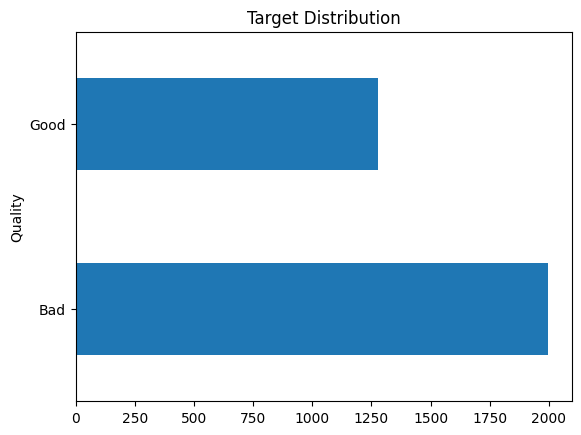

In [8]:
#Changing Binary Value to String for better understanding
df_clone["Quality"] = (
    df_clone["Quality"].replace(0, "Bad").replace(1, "Good")
)

#Visualization
ax = (
    df_clone["Quality"]
    .value_counts()
    .plot(kind="barh", title="Target Distribution")
)

#### Observation:
- Deduce that the **water quality distribution** is imbalanced, with the number of samples categorized as "Bad" being about 30% more popular in the dataset than the samples categorized as "Good"
- This maybe a concern for further processing and model implementation

#### Displaying the number of missing values in Each Column

In [9]:
print("Missing Values Summary")
print(df.isnull().sum())

Missing Values Summary
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64


#### Take note:
- Sulfate has the most number of missing data points of 781 missing values
while pH is at 491 and trihalomethanes at 162 missing values
-> Take note of these features later for **Data Processing**

- Other features have no missing values 


## Analysing and Visualizing the Distribution of each features
We will begin by visualizing the distribution of each feature using histograms so we can see how each one of them relates to ***Quality*** 


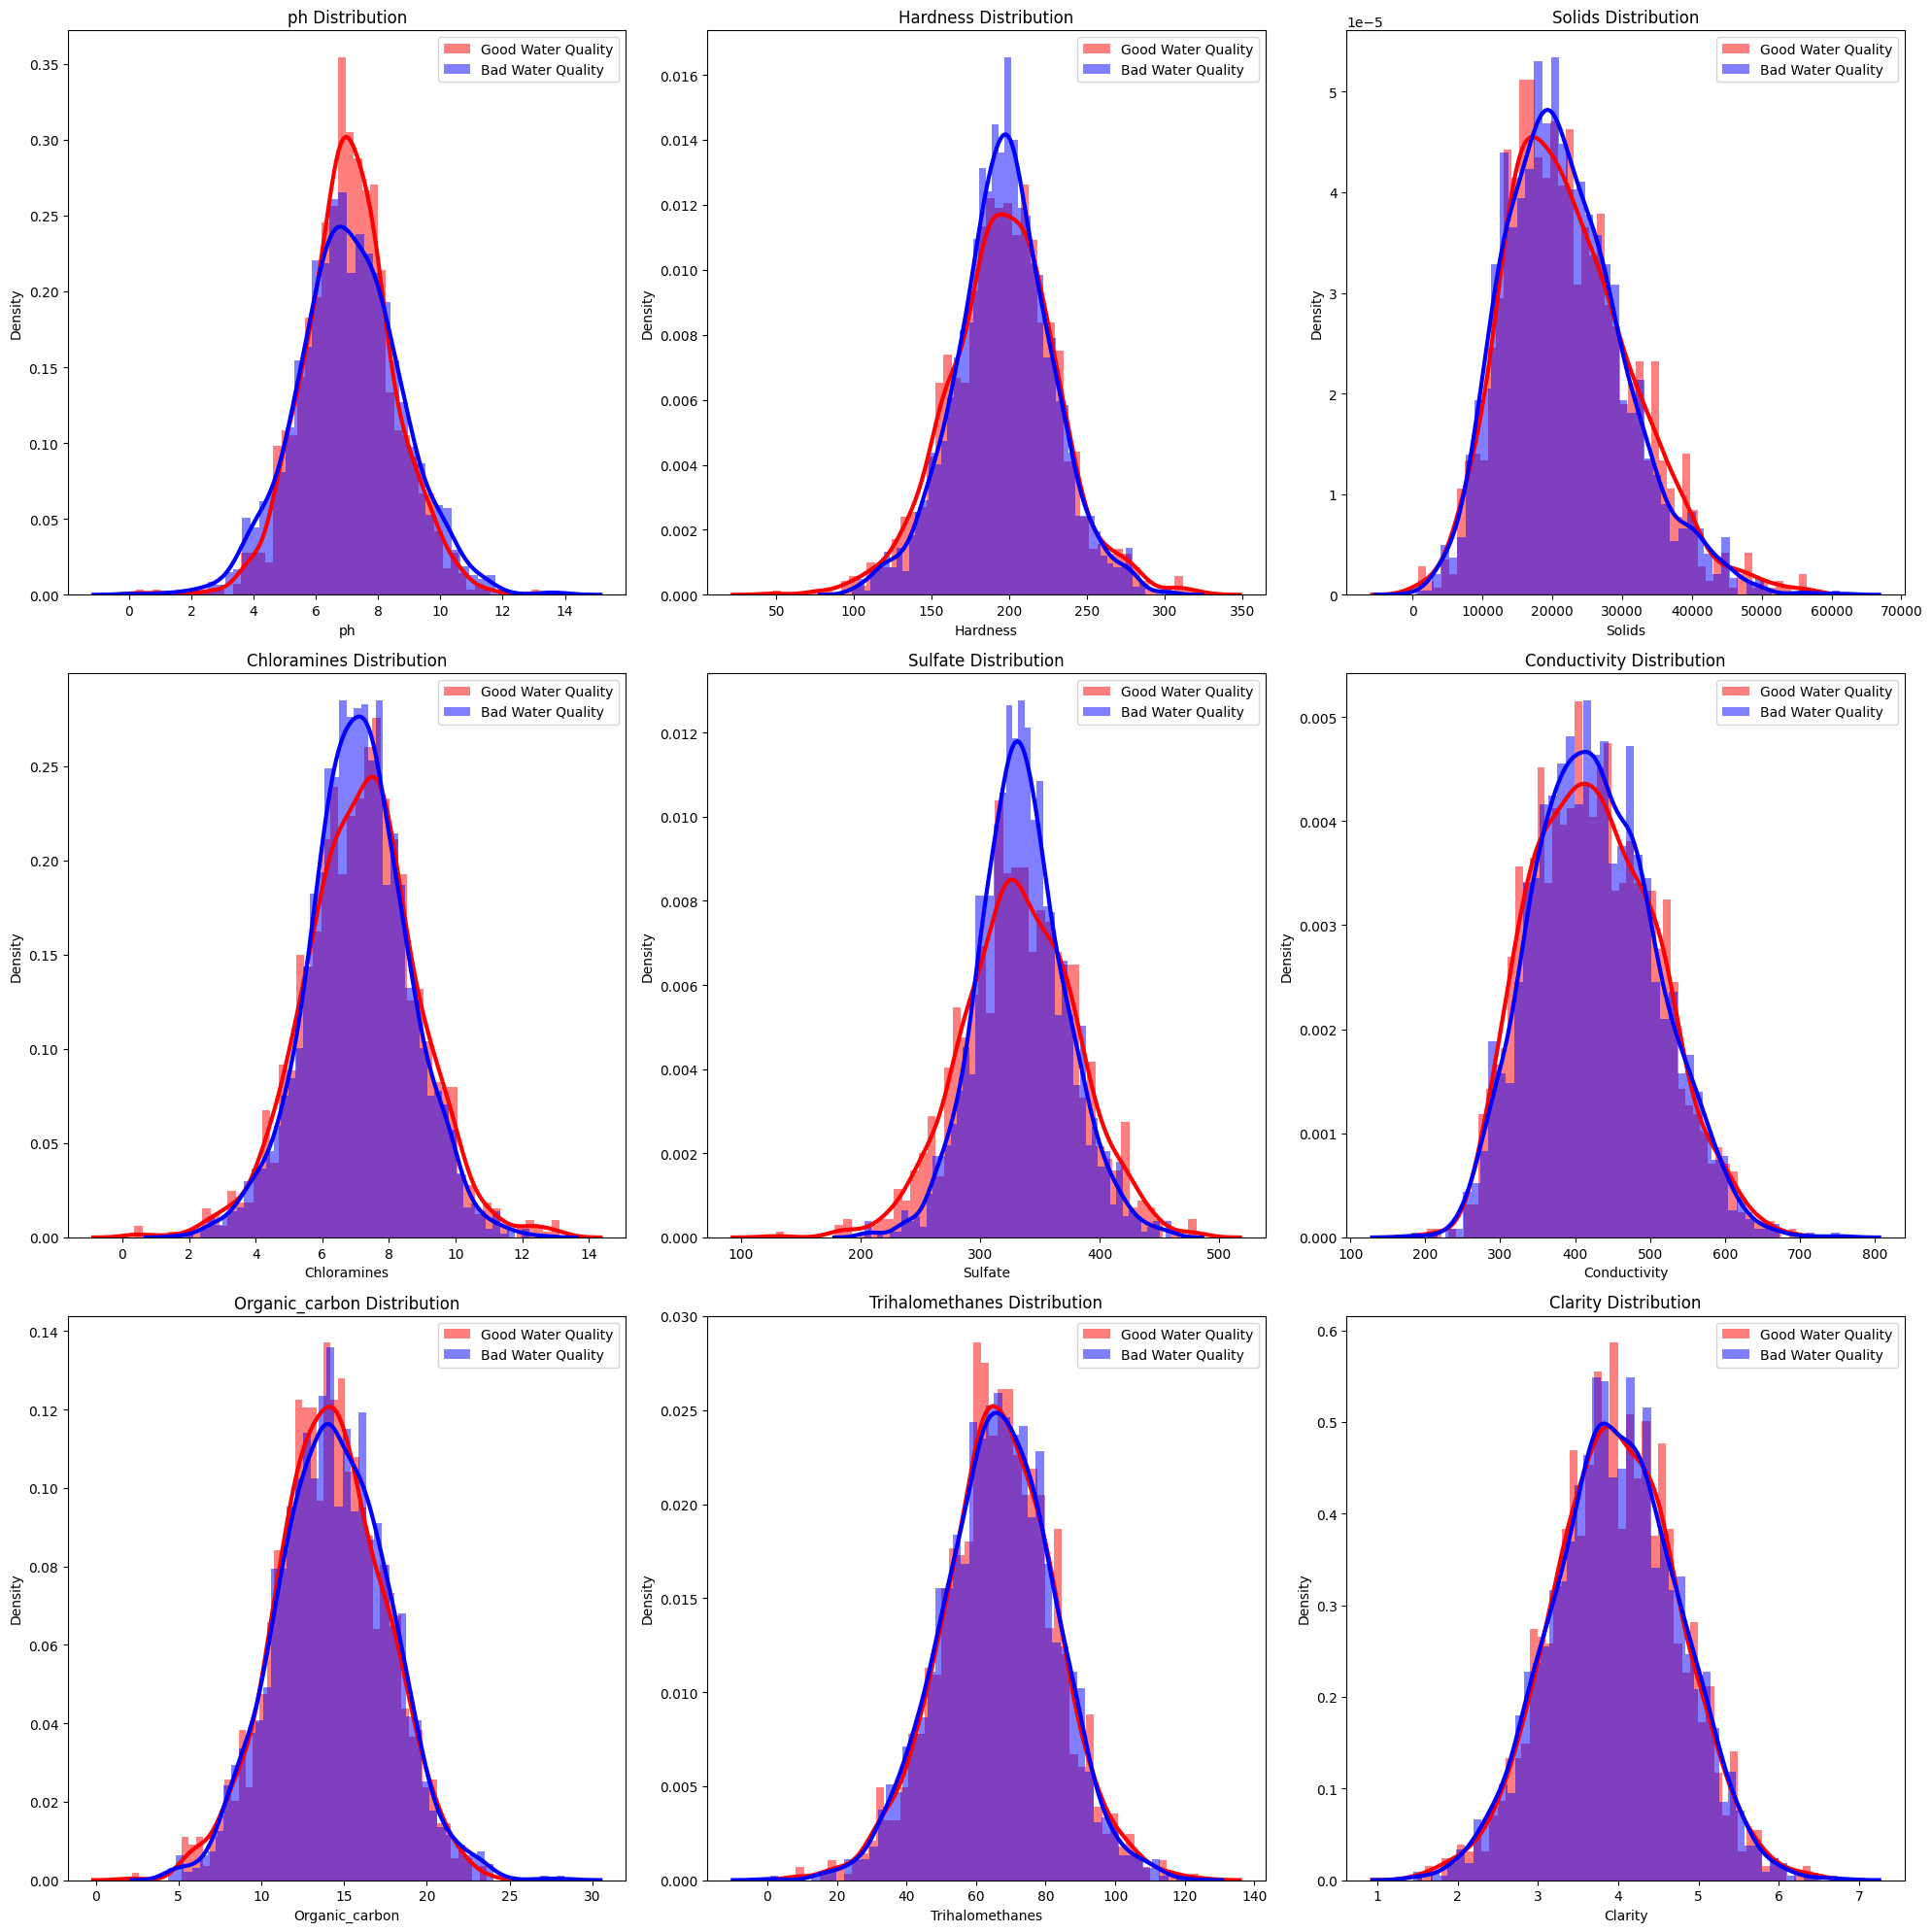

In [10]:
# Features to visualize
features_to_plot = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Clarity"]

# Set up subplots in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through features and create histograms and KDE plots
for i, feature in enumerate(features_to_plot):
    plt.sca(axes[i])
    
    plt.hist(
        df[df["Quality"] == 1][feature],
        density=True,
        bins=50,
        color="#ff000060",
        alpha=0.5,
        label="Good Water Quality",
    )
    plt.hist(
        df[df["Quality"] == 0][feature],
        density=True,
        bins=50,
        color="#0000ff88",
        alpha=0.5,
        label="Bad Water Quality",
    )
    sns.kdeplot(df[df["Quality"] == 1][feature], lw=3, color="#ff0000")
    sns.kdeplot(df[df["Quality"] == 0][feature], lw=3, color="#0000ff")

    plt.legend()
    plt.title(f"{feature} Distribution")

# Remove empty subplots
for i in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Observation and Deduction of the distribution histogram
Data shows reasonably normal distribution for most features with no anomalies or abnormal pattern

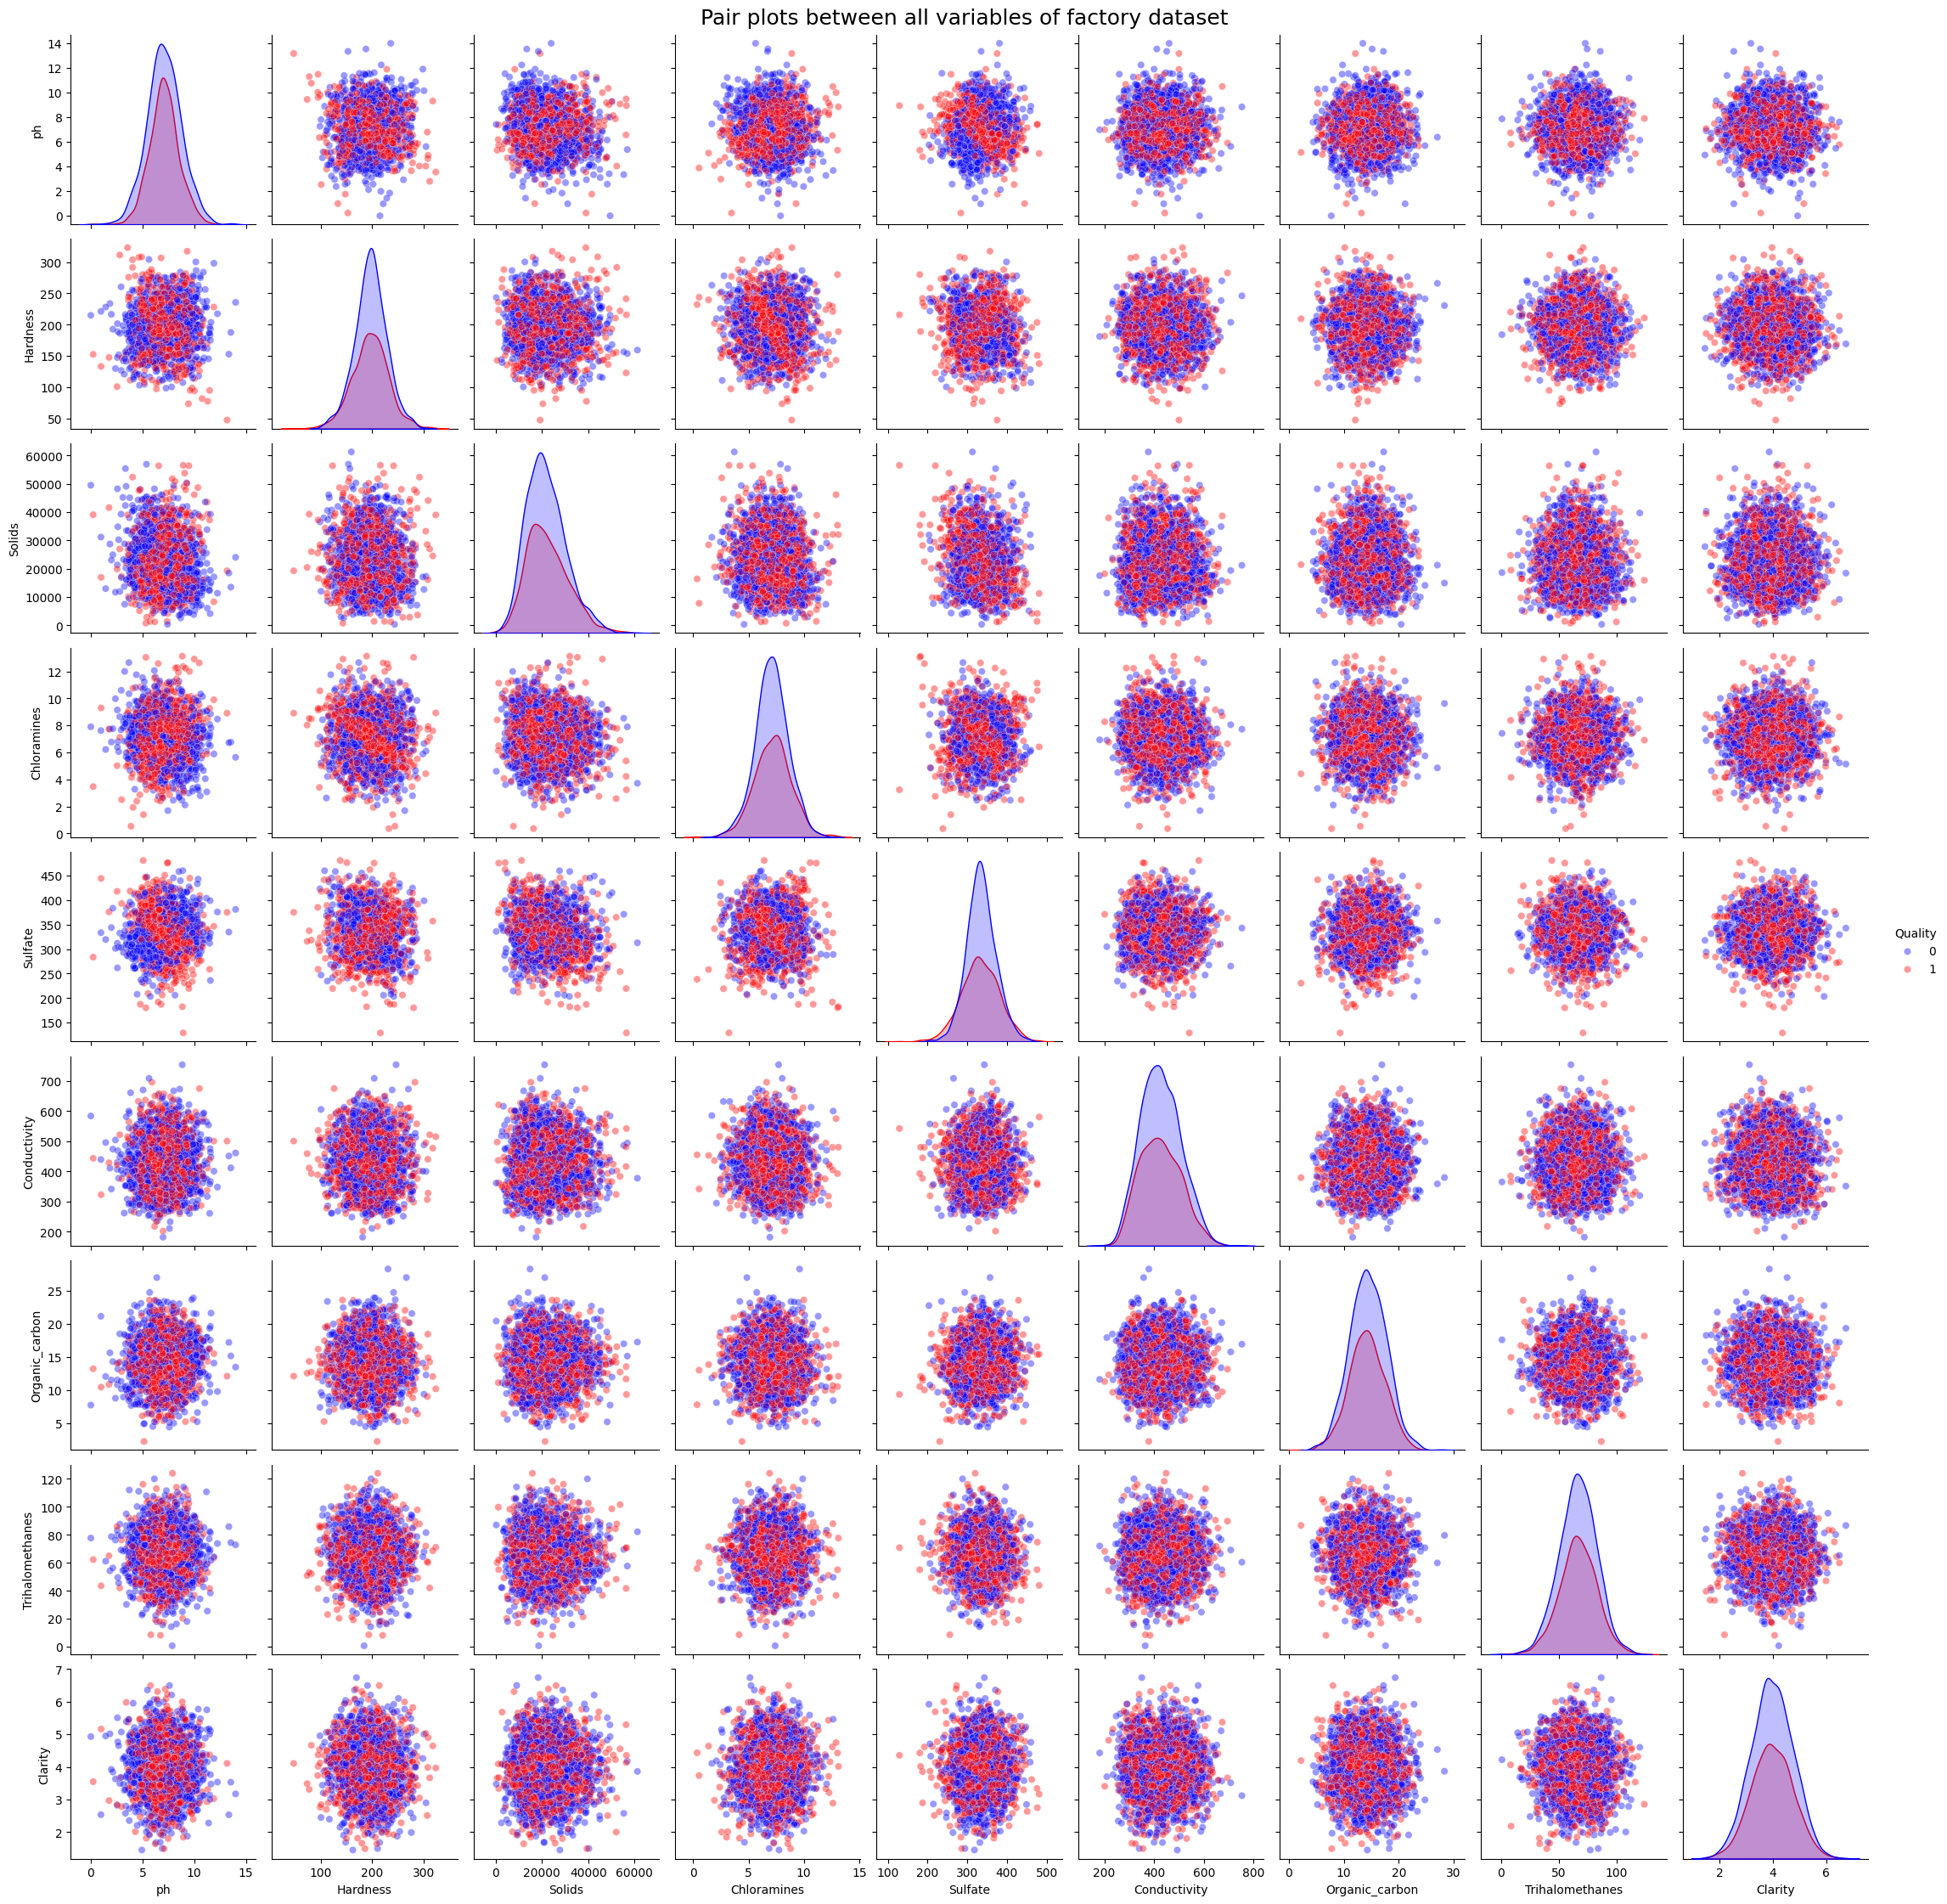

In [11]:
g = sns.pairplot(
    df,
    hue="Quality",
    palette=["b", "r"],
    plot_kws=dict(alpha=0.4),
)
g.fig.suptitle("Pair plots between all variables of factory dataset", y=1.001, fontsize=18)
plt.show()


#### ***Observation***
- There is generally **no clear trend** between features among those used to determine water quality

+ Hence, There is **no clear relationship** between them and each variable is **independent** on one another 

## ***Explore Corelation between all 9 features and the target Varible*** 


#### Exploring the corelation between each feature using Correlation Coefficients (r) with the target varible - Represent these coefficients in a heatmap

Quality            1.000000
Trihalomethanes    0.007130
Clarity            0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Quality, dtype: float64


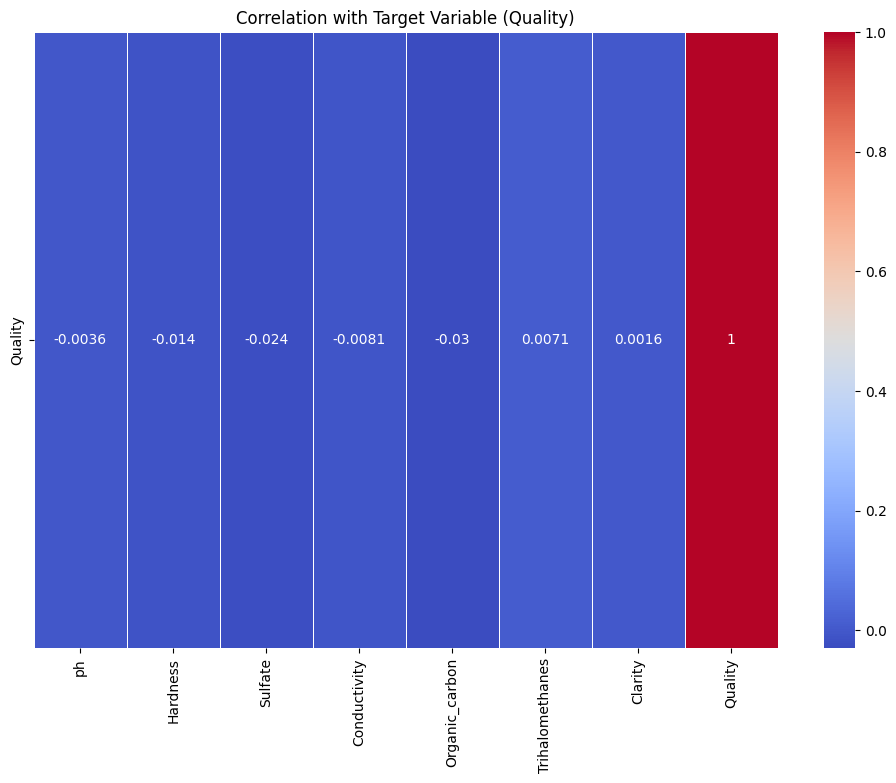

In [12]:
# Select relevant columns for correlation analysis
selected_columns = ["ph", "Hardness", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Clarity", "Quality"]

# Create a new DataFrame with selected columns
correlation_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Set up the plot

correlation_with_target = correlation_matrix['Quality'].sort_values(ascending=False)
print(correlation_with_target)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Quality']].transpose(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Target Variable (Quality)')
plt.show()

#### Observation and Deduction
- The correlation coefficients for all features range between -0.03 to 0.0016, which indicate that our features and the target variable generally have **Weak Correlation**.
- Feature with the strongest relation with the water quality is **Organic_Carbon** at (-0.03) which means that **Organic_carbon** and **Water_quality** have a negative correaltion, Quality is lower at higher concentration of organic_carbon; However this correlation is still considered weak as it is quite far from -1

#### Analysing the correlation among features (how each feature vary with one another)

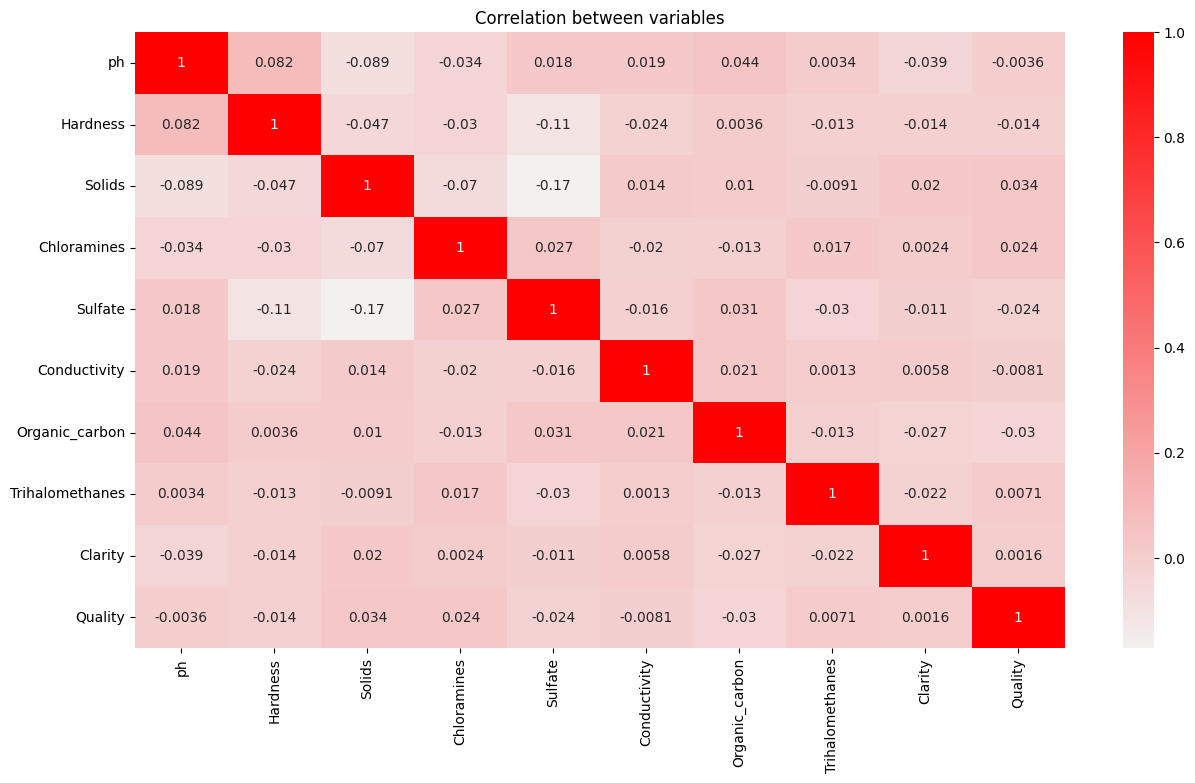

In [13]:
plt.figure(figsize=(15, 8))
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap).set(title="Correlation between variables")
plt.show()

#### Observation and Deduction
- The correlation among variable is generally low, no significant correaltion observed among variables provided.
- Correlation matrix shows weak correlation between features suggesting that they are reasonably independent of eachother. There is no multicollinearity.


### Conclusion:
- In our case, the correlations are quite weak, hence it might not be necessary to drop any feature based solely on these correlation coefficients. 

- Given that our goal is to perform classification on water quality, dropping features based solely on weak correlation with the target variable might not be the best strategy.

- As correlation coefficient only measures linear relationships , some features might be crucial for water quality but might not show strong linear correlations.

# Data Preparation

Before we can train a machine learning algorithm on our data, we first need to prepare our data.



In [14]:
random_state = 42

We notice that inside our dataset there are missing Values
## **Data Imputation**



In [15]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64

There are multiple ways to handle missing data:

1. Drop the entire column
2. Impute with Central Tendency (Mean, Mode or Median)
3. Impute with Advanced Algorithm in SKLearn (e.g. IterativeImputer, KNNImputer)

We will use the Advanced Algorithm in sklearn IterativeImputer. It will impute missing values by modelling each feature with missing values as a function of other features in a round-robin fashion.

In [16]:
# All Numerical Features that has missing values
num_cols = ["ph", "Sulfate", "Trihalomethanes"]

# initialize Imputer
imputer = IterativeImputer()
# Impute Train Data
df.loc[:, num_cols] = imputer.fit_transform(df[num_cols])

Verify that the dataset has been successfully imputed 

In [17]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Clarity            0
Quality            0
dtype: int64

### Splitting datapoints
### Separate Target Label and Features

We will first separate our target label from the features. It is also necessary to perform a label encoding on the target label to convert it to a number.

In [18]:
X = df.drop(['Quality'], axis = 1)
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random_state, stratify=y) #stratify=y

### Handling Imbalanced data through RESAMPLING

As mentioned before, the distribution of water quality is imbalanced, we can visualise this through plotting of the y_train values

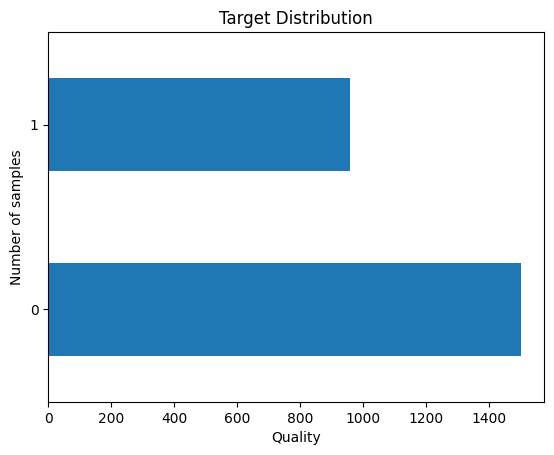

In [19]:
ax = y_train.value_counts().plot(
    kind="barh",
    title="Target Distribution",
    xlabel="Quality",
    ylabel="Number of samples",
)

To solve this imbalanced, we can use the following solutions

1. Random Resampling
2. SMOTE (Synthetic Minority Oversampling Technique)

We will be using SMOTE for this example.

In [20]:
# Balancing data - oversampling minority
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [21]:
print(X_train.shape)

(2998, 9)


### Verify that we have successfully resampled the dataset

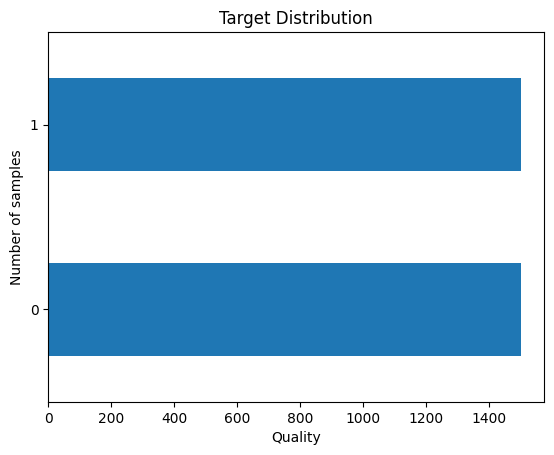

In [22]:
ax = y_train.value_counts().plot(
    kind="barh",
    title="Target Distribution",
    xlabel="Quality",
    ylabel="Number of samples",
)

# Model Selection

For model selection, We will run the processed data through some models and evaluate the results based on some **Evaluation Metrics**

### Pipeline Settings 
We do this to ensure no data leakage

In [23]:
# Define a pipeline for preprocessing with both categorical and numeric transformers
numeric_transformer = Pipeline([("imputer", IterativeImputer())])  # Impute missing values for numeric variables

# Apply transformers based on column types using ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ("numeric", numeric_transformer, ["ph", "Sulfate", "Trihalomethanes"]),  # Apply to selected numeric columns
    ],
    remainder="passthrough",  # Keep the remaining columns unchanged
)

# Define a random oversampler for handling imbalanced data
smt = SMOTE()

# Define a list of processing steps for the pipeline
steps = [
    ("preprocessing", preprocessor),
    ("oversampler", smt),
    ("standardize", StandardScaler()),
    ("model")
]
STEP_LEN = len(steps) - 1 #Determining the length of these steps (minus the model)



In [24]:
# preset scoring options for future use
scoring_methods = ["accuracy", "balanced_accuracy", "recall", "f1", "roc_auc"]

In [25]:
# This line modifies a pipeline (Pipeline from scikit-learn) by replacing a step at the position specified by STEP_LEN. 
# The step is a "dummy" classifier that predicts classes randomly. 
steps[STEP_LEN] = ("model", DummyClassifier(strategy="uniform"))
dummy = Pipeline(steps=steps)

#Fitting the train data set to the dummy classifier
dummy.fit(X_train, y_train)

#Output baseline accuracy, how often the model predict correct output
print(f"Baseline Accuracy Score :{dummy.score(X_test, y_test)}")


#This performs CROSS-VALIDATION on the training data using the dummy model. 
scores = cross_validate(
    dummy,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)

# Create a DataFrame from the scores
scores_df = pd.DataFrame(scores)

# Calculate and append the mean row
mean_row = pd.DataFrame(scores_df.mean()).T
mean_row.index = ["Mean"]
scores_df = pd.concat([scores_df, mean_row])

# Display the DataFrame with styling with green being the greatest value and red being the smallest
display(
    scores_df.style.apply(
        lambda x: [
            "background-color: red; color: white" if v else "" for v in x == x.min()
        ]
    ).apply(
        lambda x: [
            "background-color: green; color: white" if v else "" for v in x == x.max()
        ]
    )
)
# print (X_train)

Baseline Accuracy Score :0.5128205128205128


### ***Observation***
- Each row returns a fold (there are 10 folds in total) and the last column represents the average value across all fold
- The ROC AUC score being 0.5 means that the model is randomly selecting and predicting points.
- This model is severely underfitted as the accuracy from the training set is very low

# Training Model and Evaluation

We import some advanced machine learnig models from sklearn and which model performs the best while using their default parameters and select the best performing model for **Hyperparameter Tuning** later on

We will be assessing our models using accuracy, balanced_accuracy, f1, recall and roc_auc.



### Learning Curve
Learning Curve is a plot showing the progress over the experience of a specific metric related to learning during the training of a machine learning model (Classifier).

First, We need to write a function to plot the learning curve for all models.

### Initiate Classifiers with default parameters
This is to train them using the train dataset and evaluate and visualize the performance by plotting a graph

Then we fit the train dataset X_train, y_train into each model (classifier), evaluate them based on various evaluation matrixes and plot a graph of cross validation score against the size of the dataset to show how cross validation score varies with increasing of dataset for all 12 models:
### Classifiers we will be using
- DecisionTree
- RandomForest
- AdaBoost
- Logistic Regression
- KNeighbors
- Perception
- ExtraTrees
- GaussianNB
- Ridge
- SGDC

In [26]:
def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=StratifiedKFold(shuffle=True, random_state=random_state),
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    try:
        model_name = type(model[-1]).__name__
    except:
        model_name = type(model).__name__
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01,
        )
    )
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax




[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    2.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    7.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    3.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    2.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    7.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   

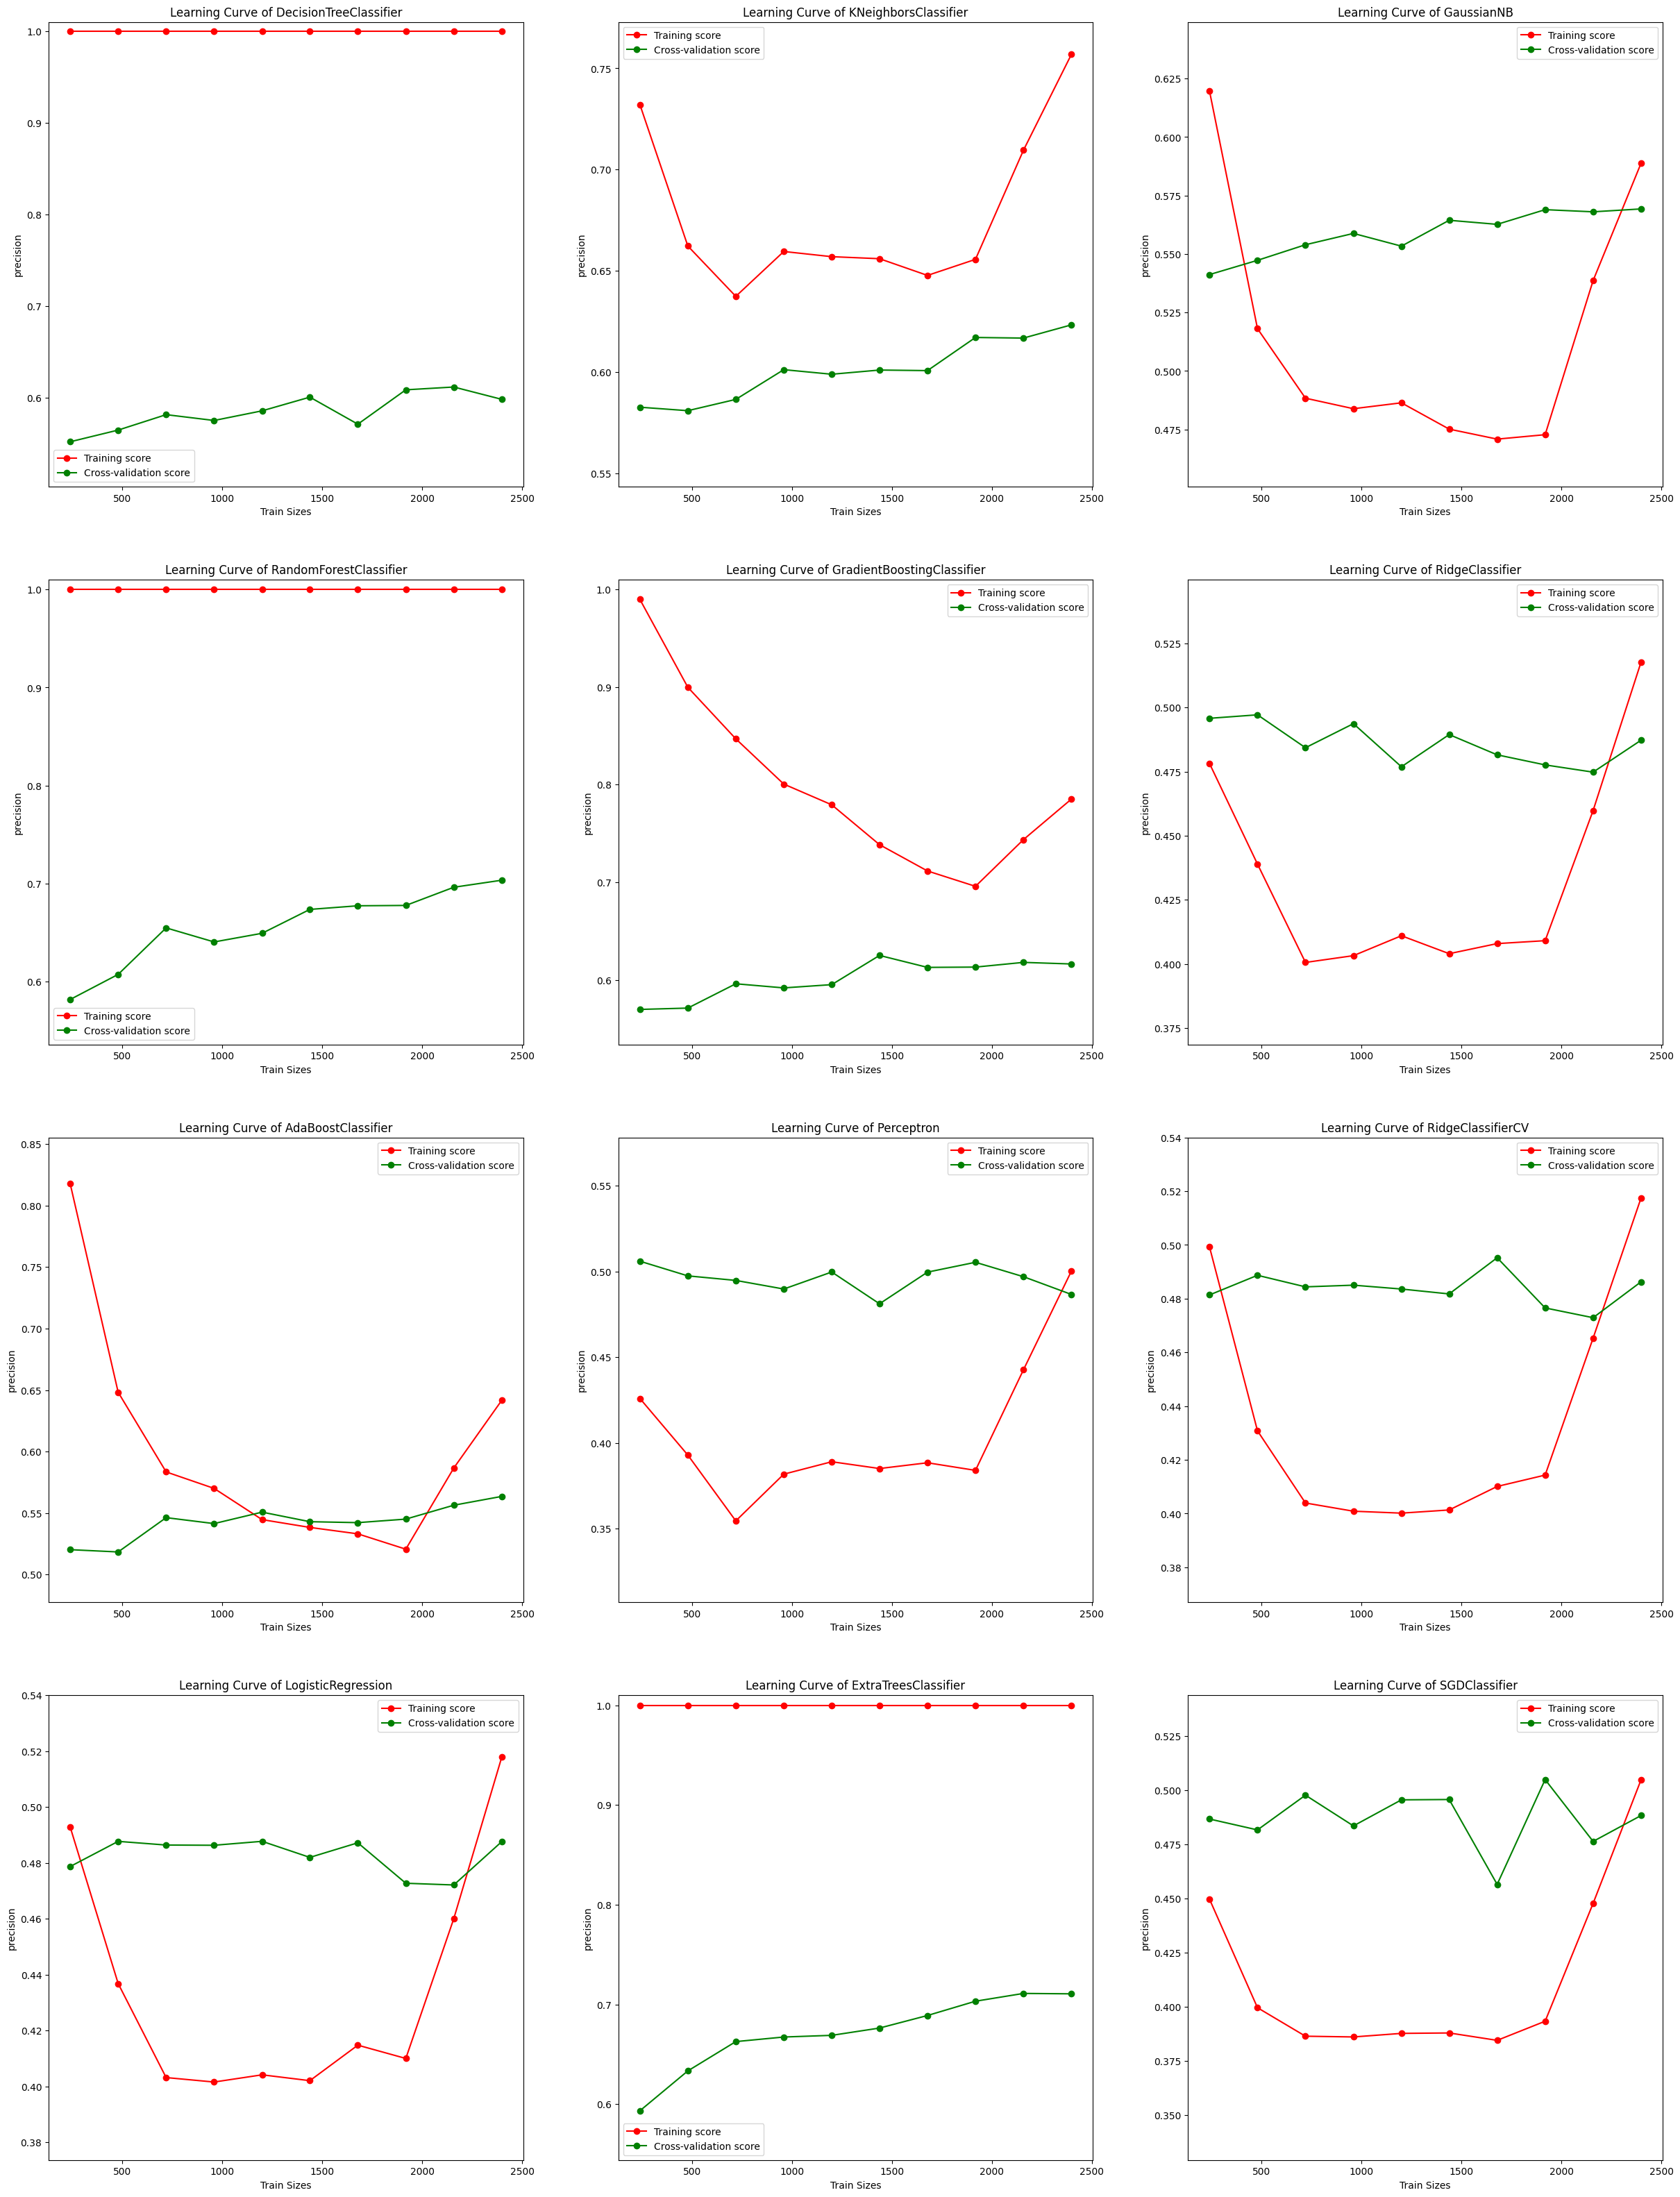

In [27]:
# Initiate Classifiers with default hyper parameters
models = [
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier(random_state=random_state)),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("Perceptron", Perceptron()),
    ("ExtraTreesClassifier", ExtraTreesClassifier(random_state=random_state)),
    ("GaussianNB", GaussianNB()),
    ("RidgeClassifier", RidgeClassifier()),
    ("RidgeClassifierCV", RidgeClassifierCV()),
    ("SGDClassifier", SGDClassifier()),
]


#Function to select each model (classifier) and evaluate them
def select_model(X_train, y_train, models, scoring, ax):
    # Making a placeholder
    out = []
    # iterate through models
    for name, model in models:
        # creating temporary pipeline
        steps[STEP_LEN] = (name, model)
        temp_pipeline = Pipeline(steps=steps)

        #Using the plot_learning_curve function in the previous cell to plot the learning curve
        plot_learning_curve(
            temp_pipeline, #using thetemporar pipeline intialized above
            X_train, 
            y_train,
            scoring="precision",
            ax=ax[models.index((name, model)) % 4, models.index((name, model)) // 4],
        )

        # Perform CrossValidation on the model and stores it in score variable
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=3,
            verbose=1,
            cv=10,
            return_train_score=True,
        )


        # get the average score and then store in a Series
        #Out is the array (placeholder) initialized above, append the values into 'Out' array.
        out.append(pd.Series(score, name=name).apply(np.mean))

    #Return out as a panda DataFrame and sort all the evalutaion matrixes in descending order
    return pd.DataFrame(out).sort_values(
        by=[
            "test_f1",
            "test_recall",
            "test_accuracy",
            "test_balanced_accuracy",
            "test_roc_auc",
        ],
        ascending=False,
    )


# Using subplots to plot all 12 models in (4x3 grid) in 1 page to save sapce  
fig, ax = plt.subplots(4, 3, figsize=(30, 40))

#Calling the select_model function initialised earlier 
#Calling scoring_methods initialised in the code cell above containing all the evaluation matrizes (f1, roc auc, recall, ...)
#Calling ax initialised in the code cell above which is responsible for plotting graph
model_scores = select_model(X_train, y_train, models, scoring_methods, ax)
plt.show()


### Why plot precision over datasize
1. We choose to plot **precision** over increasing size of dataset because:

 $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

 Our objective is to evaluate how well the machine successfully predict the water quality as good (1). Precision focuses on the accuracy of positive predictions made by the model. It calculates the ratio of true positive predictions to the total positive predictions, providing insight into the model's ability to avoid false positives.

### **Observation**
As we observe, all models except for ExtratreeClassifier, Random Forest and DecisionTree precision score increases when the train sizes exceed 2000. Some models precision score decreases as the data size increases but suddenly increased after the datasize exceed 2000.

The ExtraTree Classifier, Random Forest Classifier have good learning curves as when more data is fitted to the model (as the datasize increases), the cross validation score increases while the training scores remain constant at 1. This shows that the model are becoming **more generalised**



## Accessing Each model

In [28]:
model_scores.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)

### **Observation**
- Some models perform equally well with 100% evaluation metric score such as ROC AC F1 ReCall on the training dataset
- Perception is the worst performing model because it has the lowest test accuracy as well as test_balanced_accuracy, in fact its test_accuracy is lower than the dummy classifier which has Baseline Accuracy Score of 0.5030487804878049
- ExtraTree has almost the highest scores in every metrics and fairly low fitting time 
- RandomForest is also a good model with most metrics score being little lower than ExtraTrees. However it has the largest fitting time


#### We can further visualize models performance using a bargraph
Showing the accuracy for every model using a bar graph:

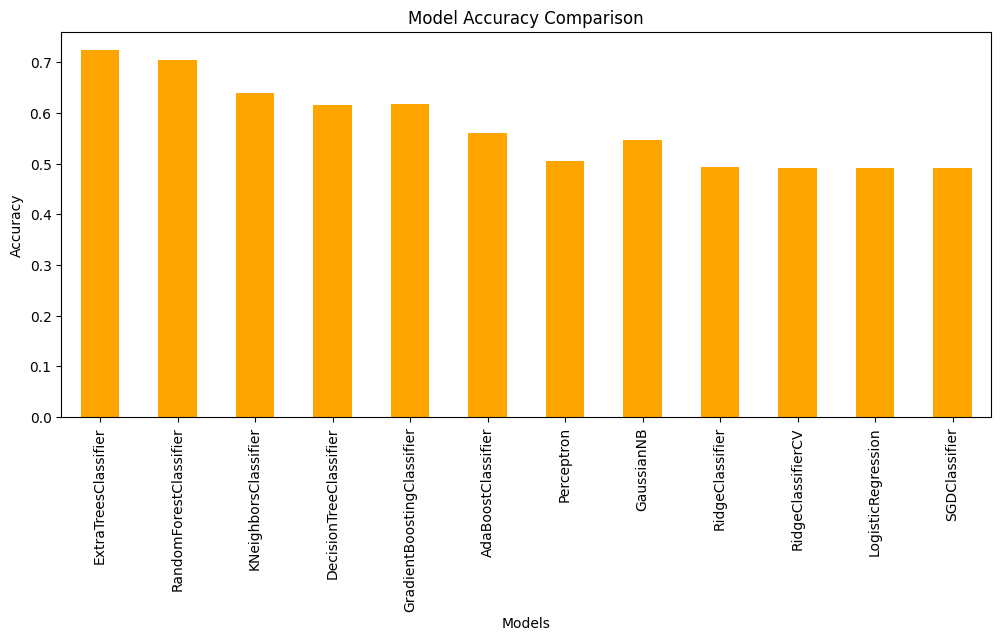

In [29]:
import matplotlib.pyplot as plt

# Extract the 'test_accuracy' column from the model_scores DataFrame
accuracy_data = model_scores['test_accuracy']

# Plot the bar graph
plt.figure(figsize=(12, 5))
accuracy_data.plot(kind='bar', color='orange')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


<u><b>Selection of model</b></u>
We will use the ExtraTreeClassifierbecause this modelseem to perform the best, having highest scores in almost all evaluation metrics

## Intializing ExtraTree Classifier

In [30]:
steps[STEP_LEN] = ("model", ExtraTreesClassifier(random_state=random_state))

extratree = Pipeline(steps=steps)

extratree.fit(X_train, y_train)

np.random.seed(random_state)
print(f"Model Accuracy Score :{extratree.score(X_train, y_train)}")
scores = cross_validate(
    extratree,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
# Create a DataFrame from the scores
scores_df = pd.DataFrame(scores)

# Calculate and append the mean row
mean_row = pd.DataFrame(scores_df.mean()).T
mean_row.index = ["Mean"]
scores_df = pd.concat([scores_df, mean_row])
# displaying scores in a table
display(
    pd.DataFrame(scores_df)
    .style.apply(
        lambda x: [
            "background-color: red; color: white" if v else "" for v in x == x.min()
        ]
    )
    .apply(
        lambda x: [
            "background-color: green; color: white" if v else "" for v in x == x.max()
        ]
    )
)


Model Accuracy Score :1.0


We just perform 10 fold cross validation on the **RandomForest Classifiers** where:
- Data is divided into 10 equal folds.
- Model trains on 9 folds, tests on the remaining one, and repeat the process for 10 times
- Metrics like accuracy are calculated for each iteration.
- We then get the average score for each metric for evaluation

The model has a fairly high accuracy at 0.725 and test_f1 score at 0.71 

### Comparing model with baseline varible (dummy variable)
To compare the ExtraTreeClassifier with Baseline model, we will be using these attributes
1. Confusion matrix
2. Learning Curve

Text(0.5, 36.72222222222221, 'Predicted Values')

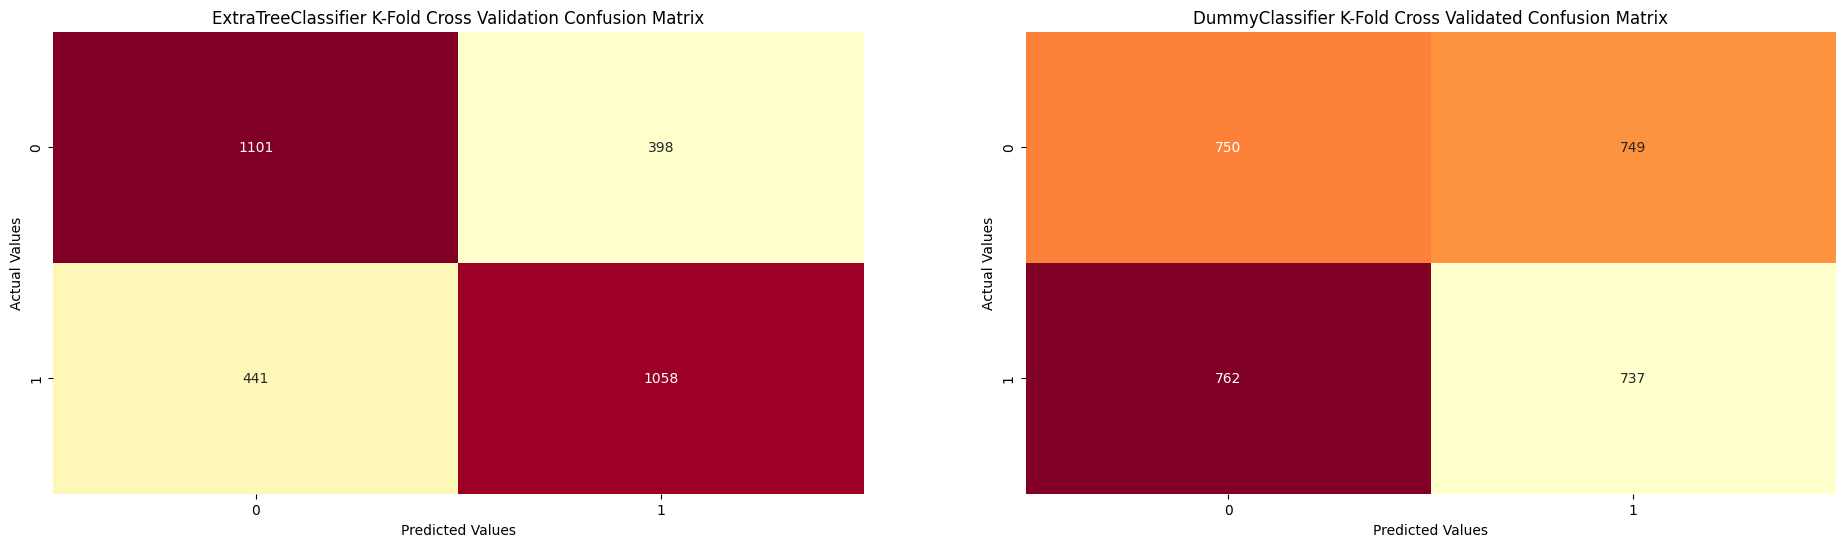

In [31]:
# Subplots for visualization of all confusion matrix using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 6))


#ExtraTree Confusion Matrix
extratreeCM = confusion_matrix(
    y_train, cross_val_predict(extratree, X_train, y_train, cv=10)
)
#Visualization of Extratree Confusion Matrix
sns.heatmap(extratreeCM, annot=True, fmt="", ax=ax1, cbar=False, cmap="YlOrRd")
ax1.set_title("ExtraTreeClassifier K-Fold Cross Validation Confusion Matrix")
ax1.set_ylabel("Actual Values")
ax1.set_xlabel("Predicted Values")

#Dummy Variable Confusion Matrix
# Baseline Confusion Matrix
dummyCM = confusion_matrix(y_train, cross_val_predict(dummy, X_train, y_train, cv=10))

#Visualiztion
sns.heatmap(dummyCM, annot=True, fmt="", ax=ax2, cbar=False, cmap="YlOrRd")
ax2.set_title("DummyClassifier K-Fold Cross Validated Confusion Matrix")
ax2.set_ylabel("Actual Values")
ax2.set_xlabel("Predicted Values")
# print(f'{extratreeCM}\n {dummyCM}')


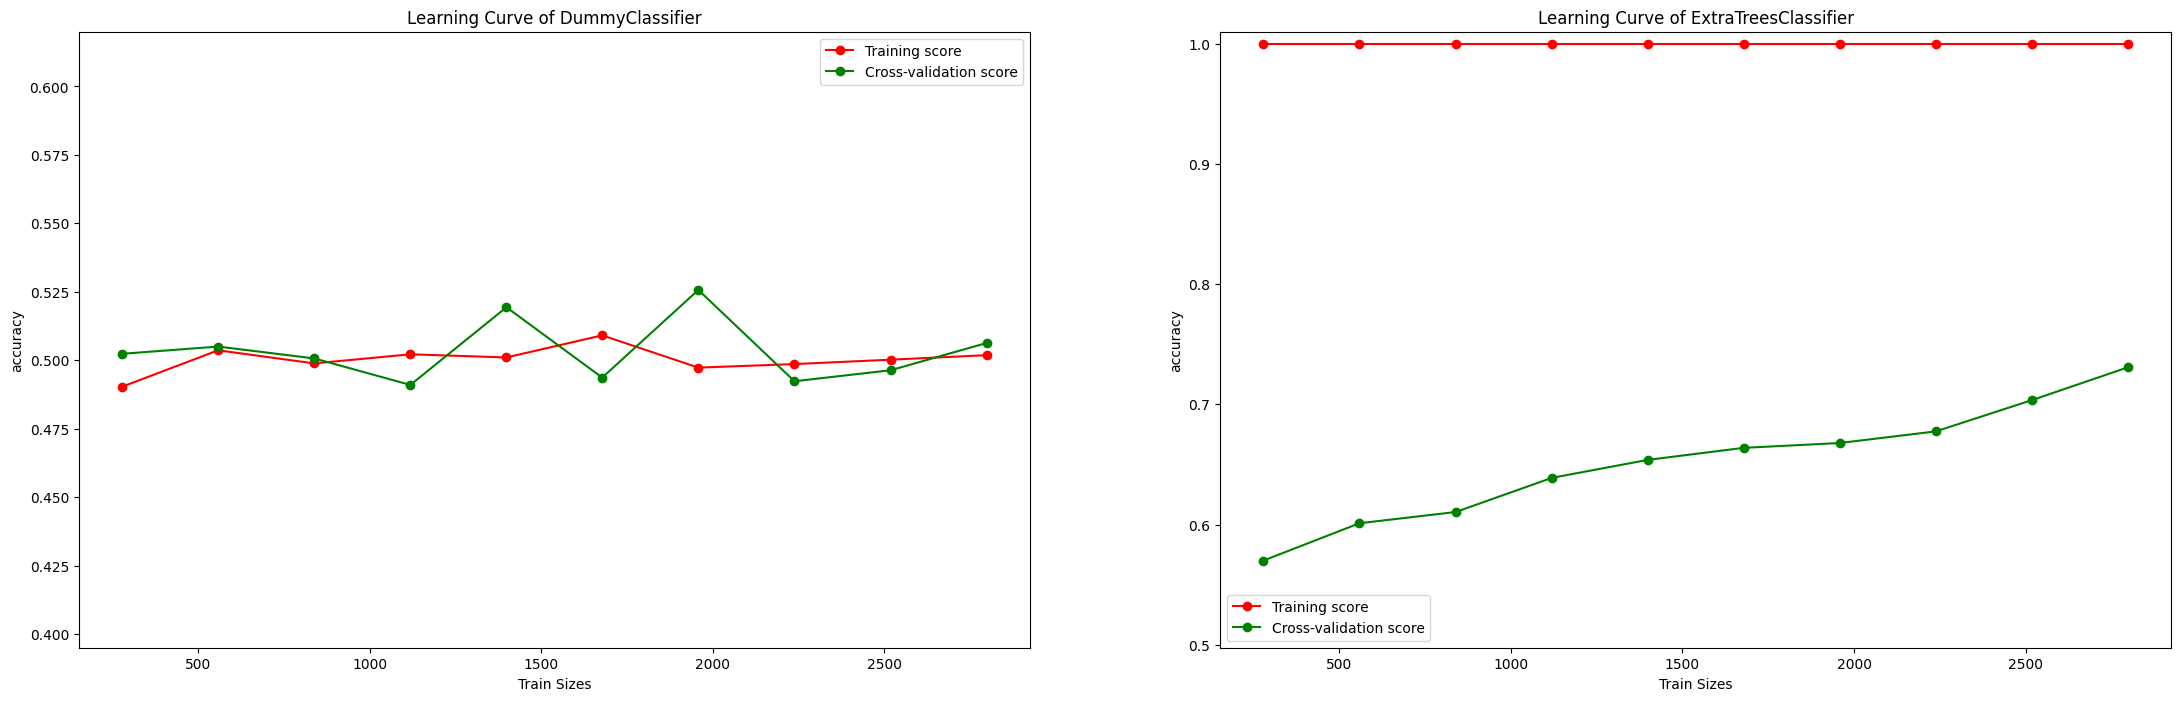

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(27, 8))
plot_learning_curve(dummy, X_train, y_train, scoring="accuracy", cv=15, ax=ax1)
plot_learning_curve(extratree, X_train, y_train, scoring="accuracy", cv=15, ax=ax2)
plt.show()

**Observations**

- Learning Curve for DummyClassifier is very random and is unrepresentative. This shows that the model is severely under-fitted
- Learning Curve of Extratree Classifier is increases and becomes more generalised as more data is added


### Generating Prediction
We will now see how model perform with unseen data (test data)

In [33]:
extratree_y_pred = extratree.predict(X_test)
dummy_y_pred = dummy.predict(X_test)

print(f'ExtraTree Classifier:\n{classification_report(y_test, extratree_y_pred, digits=3)}')
print('-------------------------------------------------------------------')
print(f'Dummy Variable:\n{classification_report(y_test, dummy_y_pred, digits=3)}')

ExtraTree Classifier:
              precision    recall  f1-score   support

           0      0.678     0.770     0.721       499
           1      0.545     0.431     0.482       320

    accuracy                          0.637       819
   macro avg      0.612     0.600     0.601       819
weighted avg      0.626     0.637     0.628       819

-------------------------------------------------------------------
Dummy Variable:
              precision    recall  f1-score   support

           0      0.614     0.485     0.542       499
           1      0.395     0.525     0.451       320

    accuracy                          0.501       819
   macro avg      0.505     0.505     0.496       819
weighted avg      0.529     0.501     0.506       819



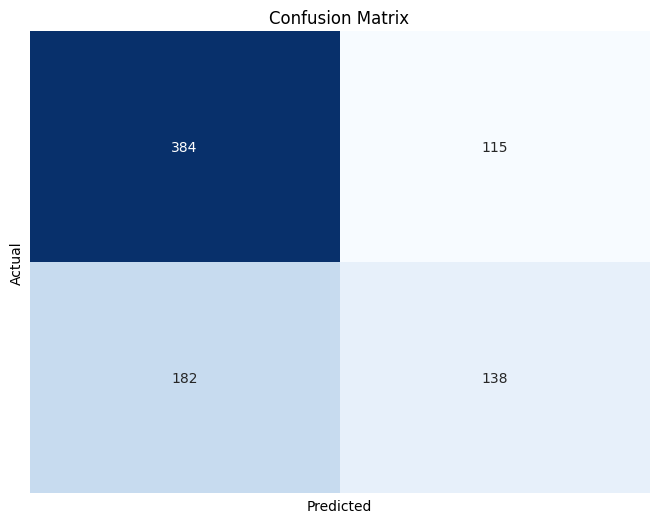

In [34]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, extratree_y_pred)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[],
            yticklabels=[])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model Improvement

First we retrieve the list of hyperparameters (parameters that are set as default in the training process); they can be tuned or modified.

In [35]:
list(ExtraTreesClassifier().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

### Hyperparameter Tuning and Evaluation
As observed, these are some of the parameters and their roles, we will be tuning 3 of them :
- n_estimators: The number of trees in the forest.
- max_features: The number of features to consider when looking for the best split.
- max_depth: The maximum depth of the tree.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.
- criterion: The function to measure the quality of a split.
- random_state: Seed for controlling randomness.

We will be using RandomizedSearchCV to run through the parameters to see which model's parameter will give the best f1 score.

We choose RandomizedSearchCV as:

Grid search manually defines combinations, while RandomizedSearchCV randomly selects them  and do training of the model. This means that generally RandomizedSearchCV will be faster than GridSearchCV. GridSearchCV will find the best values based on scoring metrics however, RandomizedSearchCV will choose n_iter(n_iteration) and compare to see which of the following gives the best metrics

In [36]:
# Create the parameter grid
params_grid = {
    'n_estimators' : [100, 200, 500],
    'min_samples_leaf': [5,10,20],
    'max_features': [2,3,4]

}


# Creating a model based on the pipeline
steps[STEP_LEN] = (
    "hyperparameter",
    RandomizedSearchCV(
        ExtraTreesClassifier(
            min_samples_split=2, min_samples_leaf=1, criterion="entropy"
        ),
        params_grid,
        cv=2, # determines the cross-validation splitting strategy. It specifies the number of folds in a (Stratified) KFold. 
        verbose=1,
        n_jobs=-1, #n_jobs is set to -1, it uses all available CPU cores.
        scoring="f1",
        n_iter=60, ## Number of random parameter settings that are tried during search
        random_state=random_state,
    ),
)

extratree_search = Pipeline(steps=steps)
# Fitting Model
extratree_search.fit(X_train, y_train)
print(extratree_search.named_steps["hyperparameter"].best_estimator_)
print(extratree_search.named_steps["hyperparameter"].best_params_)
print(extratree_search.named_steps["hyperparameter"].best_score_)


Fitting 2 folds for each of 27 candidates, totalling 54 fits


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=60. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ExtraTreesClassifier(criterion='entropy', max_features=4, min_samples_leaf=5,
                     n_estimators=500)
{'n_estimators': 500, 'min_samples_leaf': 5, 'max_features': 4}
0.6412723733561221


### Tuned Model Evaluation

We will evaluate the model on an independent test set to see if the model is able to generalize to unseen examples


In [37]:
y_test.shape

(819,)

### Initiate model after hyperparameter training

After training, we will have the model which will perform the best. Let's see if there is a boost in results after training


In [52]:
steps[STEP_LEN] = (
    "tunedmodel",
    extratree_search.named_steps["hyperparameter"].best_estimator_,
)

tuned = Pipeline(steps=steps)
# Fitting Model
tuned.fit(X_train, y_train)
# Creating predictions
np.random.seed(random_state)
tunedtree_y_pred = tuned.predict(X_test)
print(f'Tuned ExtraTree Classifier:\n{classification_report(y_test, tunedtree_y_pred, digits=3)}')
print(f'\n ---------------------------------------------------------')
print(f'ExtraTree Classifier:\n{classification_report(y_test, extratree_y_pred, digits=3)}')


Tuned ExtraTree Classifier:
              precision    recall  f1-score   support

           0      0.694     0.721     0.707       499
           1      0.537     0.503     0.519       320

    accuracy                          0.636       819
   macro avg      0.615     0.612     0.613       819
weighted avg      0.632     0.636     0.634       819


 ---------------------------------------------------------
ExtraTree Classifier:
              precision    recall  f1-score   support

           0      0.678     0.770     0.721       499
           1      0.545     0.431     0.482       320

    accuracy                          0.637       819
   macro avg      0.612     0.600     0.601       819
weighted avg      0.626     0.637     0.628       819



#### ***Observation***
As we can see, neither F1 score or accuracy increases much after hyperparameter tuning. Hence, I conclude that rough hyperparameter tuning made little improvement on default ExtraTree Classifier model

### Final Model
The final model will be the tuned ExtratreeClassifer 

<Axes: >

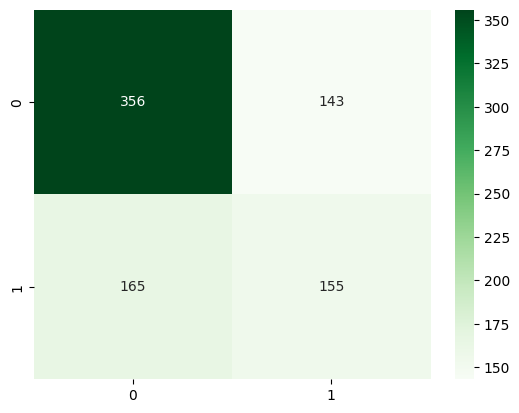

In [39]:
final_model = tuned
final_model.fit(X_train, y_train)
#make the results reproducible and keep them constant, set a fixed seed for the random number generator.
np.random.seed(random_state)
y_pred = final_model.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap ='Greens', fmt='d')


In [40]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       499
           1       0.52      0.48      0.50       320

    accuracy                           0.62       819
   macro avg       0.60      0.60      0.60       819
weighted avg       0.62      0.62      0.62       819



### Saving Model

In [54]:
pickle.dump(final_model, open("final_model_classifier.p", "wb"))
tuned_tree_clf = pickle.load(open("final_model_classifier.p", "rb"))
##WB and RB stands for write binary and read binary

### Feature Importance
Defining which of the features contribute the most to the model making predictions.

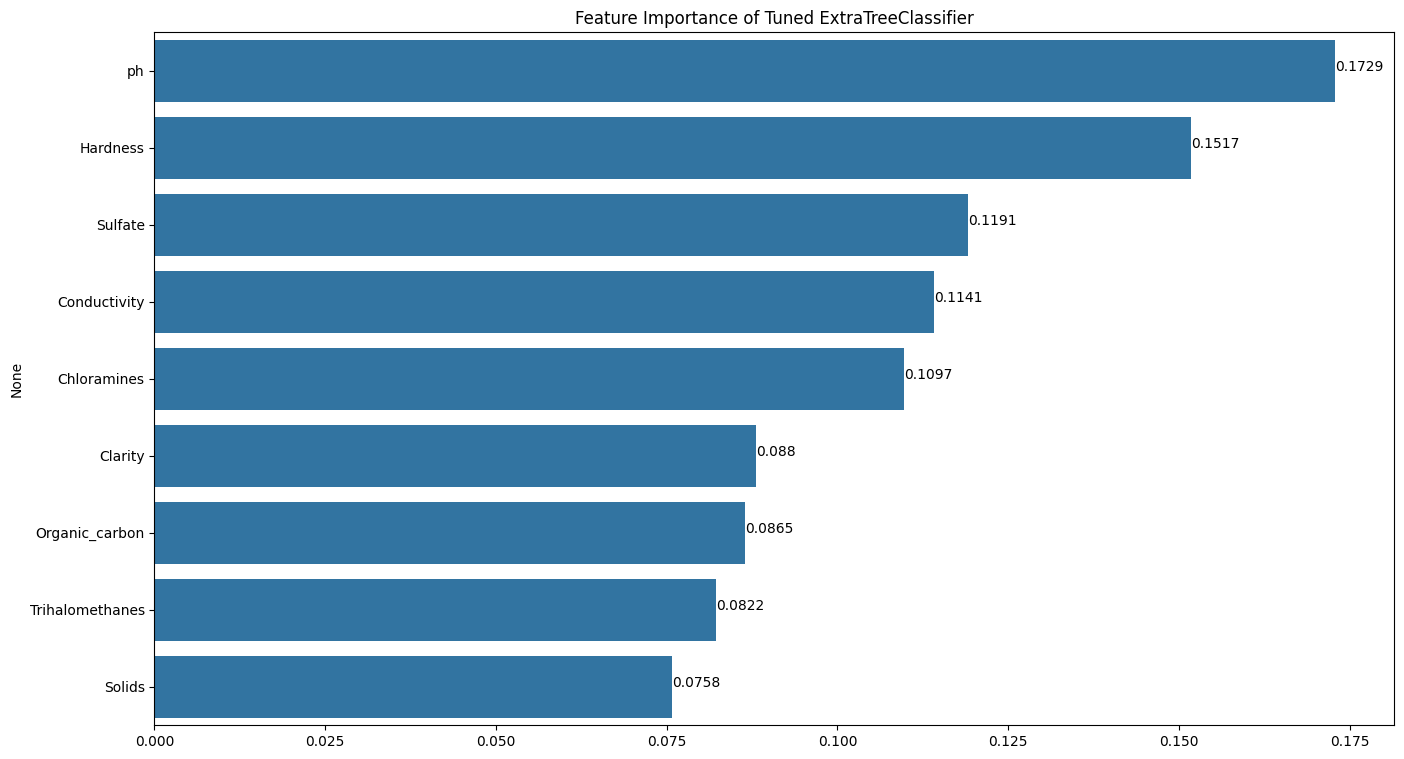

In [59]:
# Calculate feature importances using the 'feature_importances_' attribute of the last step in the tuned pipeline
importance = pd.Series(
    tuned[-1].feature_importances_, index=X_train.columns
).sort_values(ascending=False)

# Create a new figure and axis with a specified size for the plot
fig, ax = plt.subplots(figsize=(16, 9))

# Create a horizontal bar plot using Seaborn, displaying features with importance greater than 0
sns.barplot(
    x=importance[importance > 0].values, y=importance[importance > 0].index, ax=ax
)

# Set the title of the plot based on the tuned model used
ax.set_title("Feature Importance of Tuned {}".format("ExtraTreeClassifier"))

# Add annotations (feature importance values) to the right of each bar in the plot
[
    ax.text(x=v, y=i, s=round(v, 4))
    for i, v in zip(np.arange(0, len(importance)), importance[importance > 0].values)
]

# Display the plot
plt.show()


pH and Hardness and Sulfate are the 3 features that seem to be the biggest indicator regarding whether a water sample is safe.

# Summary

We have successfully created a model that is able to predict if a sample of water is safe. Through extensive feature engineering, we have been able to develop a simple model that is able to predict whether a sample of water is good. However, the model still faces some limitations and its accuracy is quite low at around 63%. It has only been trained and tested on synthetically generated data, there are other factors that affects water quality that has not been taken under the scope. For the model to be fully deployed, it is necessary to collect more data and test it on real life examples.

## Reflection 
--- 
I face a lot of difficulties choosing and fine tuning model; From understanding how hyperparameter tuning works to choosing between gridsearch and randomsearchCV to choosing which parameter to tune to get the best results.. This allow me to do more reseach on the topic and gain a better understaning about supervised learning as a whole. I also realize that understanding the context of the data is crucial as every dataset is distinct and we cant perform the same steps for every dataset to achieve the optimal model.